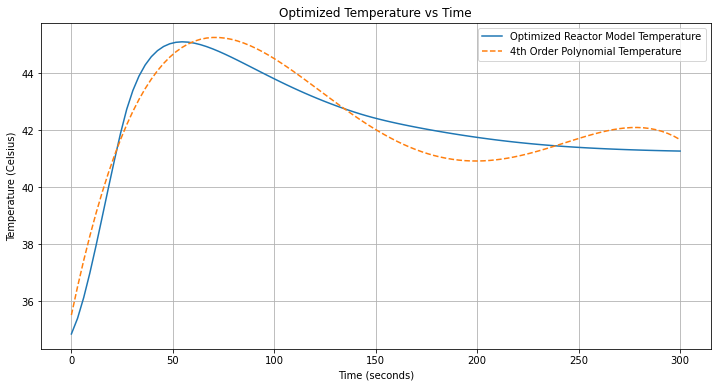

Optimized Parameters:
k (L/(mol*s)): Initial = 5e-05, Optimized = 0.0001, % Change = 80.39%
delta_H (J/mol): Initial = 200000, Optimized = 11083.0593, % Change = -94.46%
Cp (J/(g*K)): Initial = 4.18, Optimized = 1.2254, % Change = -70.68%
ambient_temperature (K): Initial = 278, Optimized = 314.3616, % Change = 13.08%
initial_volume (L): Initial = 567.8115, Optimized = 208.3393, % Change = -63.31%
heat_transfer_coefficient (W/(m^2*K)): Initial = 3000, Optimized = 1993.3151, % Change = -33.56%
reactor_surface_area (m^2): Initial = 1.5, Optimized = 2.9400, % Change = 96.00%


In [20]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Constants and initial conditions for the reactor equations
initial_temperature = 308  # Initial temperature in K
initial_SrOH2_concentration = 320  # Initial concentration of Sr(OH)2 in M
initial_H2O2_concentration = 0  # Initial concentration of H2O2 in M
time_ode = np.linspace(0, 300, 100)  # Simulate for 5 minutes
initial_conditions = [initial_SrOH2_concentration, initial_H2O2_concentration, initial_temperature]

# Flow rate function for H2O2
def flow_rate_H2O2(t):
    if t <= 25:
        return 40 * 0.55 
    elif 25 < t < 140:
        return 0
    elif 140 <= t < 300:
        return 12 * 0.55
    else:
        return 0

# Reactor equations with optimization parameters
def reactor_equations(y, t, k, delta_H, Cp, ambient_temperature, initial_volume, heat_transfer_coefficient, reactor_surface_area):
    [SrOH2, H2O2, T] = y
    rate_of_reaction = k * SrOH2 * H2O2
    heat_generated = delta_H * rate_of_reaction
    heat_loss = heat_transfer_coefficient * reactor_surface_area * (T - ambient_temperature)
    net_heat_change = heat_generated - heat_loss
    dT_dt = net_heat_change / (Cp * initial_volume * 1000)
    dSrOH2_dt = -rate_of_reaction
    dH2O2_dt = flow_rate_H2O2(t) - rate_of_reaction
    return [dSrOH2_dt, dH2O2_dt, dT_dt]

# Polynomial temperature model
coefs = [3.55148541e+01, 3.38663851e-01, -3.84497570e-03, 1.57397333e-05, -2.15266030e-08]
def polynomial_function(t):
    return coefs[0] + coefs[1]*t + coefs[2]*t**2 + coefs[3]*t**3 + coefs[4]*t**4
temperature_polynomial = polynomial_function(time_ode)

# Cost function for optimization
def cost_function(params):
    solution = odeint(reactor_equations, initial_conditions, time_ode, args=tuple(params))
    temperature_ode = solution[:, 2] - 273.15  # Convert to Celsius
    return np.sum((temperature_ode - temperature_polynomial)**2)

# Initial guess for parameters
params_initial = [0.05e-3, 200000, 4.18, 278, 150 * 3.78541, 3000, 1.5]

# Optimization
result = minimize(cost_function, params_initial, method='Nelder-Mead')

# Optimized parameters
optimized_params = result.x

# Solve the ODEs with optimized parameters
solution_optimized = odeint(reactor_equations, initial_conditions, time_ode, args=tuple(optimized_params))
temperature_ode_optimized = solution_optimized[:, 2] - 273.15

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_ode, temperature_ode_optimized, label='Optimized Reactor Model Temperature')
plt.plot(time_ode, temperature_polynomial, label='4th Order Polynomial Temperature', linestyle='--')
plt.title('Optimized Temperature vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()

# Print optimized parameters
param_names = ['k (L/(mol*s))', 'delta_H (J/mol)', 'Cp (J/(g*K))', 'ambient_temperature (K)', 
               'initial_volume (L)', 'heat_transfer_coefficient (W/(m^2*K))', 'reactor_surface_area (m^2)']
print("Optimized Parameters:")
for name, initial, optimized in zip(param_names, params_initial, optimized_params):
    print(f"{name}: Initial = {initial}, Optimized = {optimized:.4f}, % Change = {(100 * (optimized - initial) / initial):.2f}%")



C:\Users\allen\AppData\Local\Temp\ipykernel_27184\3453476218.py:12: RuntimeWarning: overflow encountered in exp
  k = k0 * np.exp(-Ea / (R * T))
C:\Users\allen\AppData\Local\Temp\ipykernel_27184\3453476218.py:13: RuntimeWarning: overflow encountered in scalar multiply
  rate_of_reaction = k * SrOH2 * H2O2 * V


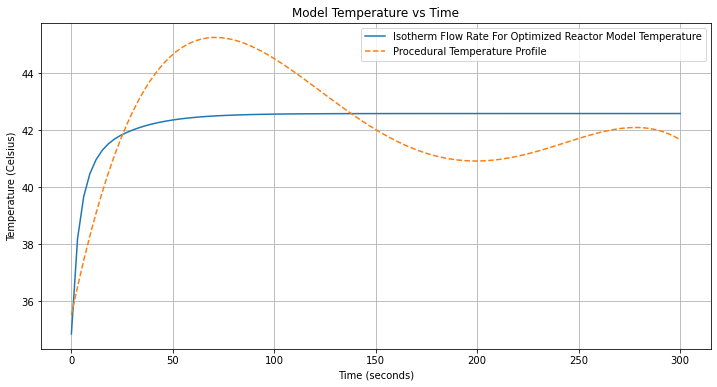

Optimized Parameters:
k (L/(mol*s)): Initial = 5e-05, Optimized = 0.0000
Ea (J/mol): Initial = 200000, Optimized = 225675.8910
delta_H (J/mol): Initial = -50000, Optimized = -95282.1606
Cp (J/(g*K)): Initial = 4.18, Optimized = 0.0692
ambient_temperature (K): Initial = 278, Optimized = 315.7410
heat_transfer_coefficient (W/(m^2*K)): Initial = 1500, Optimized = 1524.6594


In [27]:
initial_temperature = 308  # K
initial_SrOH2_concentration = 320  # M
initial_H2O2_concentration = 0  # M
time_ode = np.linspace(0, 300, 100)  # 5 minutes
initial_volume = 146  # L
reactor_surface_area = 1.5  # m^2
initial_conditions = [initial_SrOH2_concentration, initial_H2O2_concentration, initial_temperature, initial_volume]

def reactor_equations(y, t, k0, Ea, delta_H, Cp, ambient_temperature, heat_transfer_coefficient, reactor_surface_area):
    [SrOH2, H2O2, T, V] = y
    R = 8.314  # J/(mol*K)
    k = k0 * np.exp(-Ea / (R * T))
    rate_of_reaction = k * SrOH2 * H2O2 * V   
    heat_generated = delta_H * rate_of_reaction
    heat_loss = heat_transfer_coefficient * reactor_surface_area * (T - ambient_temperature)
    net_heat_change = heat_generated - heat_loss
    dT_dt = net_heat_change / (Cp * V * 1000)  
    dSrOH2_dt = -rate_of_reaction / V
    dH2O2_dt = (flow_rate_H2O2(t) - rate_of_reaction) / V
    dV_dt = flow_rate_H2O2(t)
    
    return [dSrOH2_dt, dH2O2_dt, dT_dt, dV_dt]

coefs = [3.55148541e+01, 3.38663851e-01, -3.84497570e-03, 1.57397333e-05, -2.15266030e-08]
def polynomial_function(t):
    return coefs[0] + coefs[1]*t + coefs[2]*t**2 + coefs[3]*t**3 + coefs[4]*t**4
temperature_polynomial = polynomial_function(time_ode)

def cost_function(params, initial_conditions, time_ode, reactor_surface_area):
    # Unpack params
    k0, Ea, delta_H, Cp, ambient_temperature, heat_transfer_coefficient = params
    
    # Solve the ODE with the current parameters
    solution = odeint(reactor_equations, initial_conditions, time_ode, args=(k0, Ea, delta_H, Cp, ambient_temperature, heat_transfer_coefficient, reactor_surface_area))
    temperature_model = solution[:, 2]  # Assuming the third column of your solution is temperature
    
    # Define a target temperature profile to compare against (this is just an example, you'll need to replace it)
    temperature_target = polynomial_function(time_ode) + 273.15  # Assuming your polynomial function returns Celsius and converting it to Kelvin
    
    # Calculate the cost as the sum of squared differences between model and target temperatures
    cost = np.sum((temperature_model - temperature_target) ** 2)
    
    return cost
params_initial = [0.05e-3, 200000, -50000, 4.18, 278, 1500]

# Now, call minimize with this corrected cost_function
result = minimize(cost_function, params_initial, args=(initial_conditions, time_ode, reactor_surface_area), method='nelder-mead')

optimized_params = result.x

# Ensure optimized_params is a tuple and concatenate with reactor_surface_area inside a new tuple for passing to odeint
args_tuple = tuple(optimized_params) + (reactor_surface_area,)

solution_optimized = odeint(reactor_equations, initial_conditions, time_ode, args=args_tuple)
temperature_ode_optimized = solution_optimized[:, 2] - 273.15  # Example of extracting and adjusting temperature, adjust index as needed


plt.figure(figsize=(12, 6))
plt.plot(time_ode, temperature_ode_optimized, label='Isotherm Flow Rate For Optimized Reactor Model Temperature')
plt.plot(time_ode, temperature_polynomial, label='Procedural Temperature Profile', linestyle='--')
plt.title('Model Temperature vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()

param_names = ['k (L/(mol*s))', 'Ea (J/mol)', 'delta_H (J/mol)', 'Cp (J/(g*K))', 'ambient_temperature (K)', 'heat_transfer_coefficient (W/(m^2*K))', 'reactor_surface_area (m^2)']
print("Optimized Parameters:")
for name, initial, optimized in zip(param_names, params_initial, optimized_params):
    print(f"{name}: Initial = {initial}, Optimized = {optimized:.4f}")

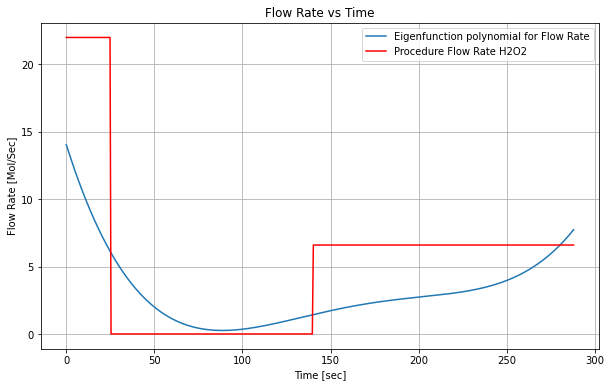

[ 2.66091660e-08 -1.78263452e-05  4.28889411e-03 -4.14157802e-01
  1.40454076e+01]


In [28]:
time = np.array([0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198, 216, 234, 252, 270, 288])
flow_rate = np.array([16, 5, 3, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 5, 6, 7])

coefficients = np.polyfit(time, flow_rate, 4)

polynomial = np.poly1d(coefficients)

time_plot = np.linspace(min(time), max(time), 500)
flow_rate_plot = polynomial(time_plot)
    
flow_rate_H2O2_values_plot = [flow_rate_H2O2(t) for t in time_plot]

plt.figure(figsize=(10, 6))
plt.plot(time_plot, flow_rate_plot, '-', label='Eigenfunction polynomial for Flow Rate')
plt.plot(time_plot, flow_rate_H2O2_values_plot, '-', label='Procedure Flow Rate H2O2', color='red') # Continuous line for H2O2
plt.xlabel('Time [sec]')
plt.ylabel('Flow Rate [Mol/Sec]')
plt.legend()
plt.title('Flow Rate vs Time')
plt.grid()
plt.show()

print(coefficients)